In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

# Define the data
weight = [45, 58, 48, 60, 70, 78, 80, 90, 95, 78, 82, 95, 105, 100, 85, 78, 50, 65, 76, 87, 45, 56, 72]
height = [120, 135, 123, 145, 160, 162, 175, 182, 170, 176, 182, 175, 183, 170, 177, 140, 159, 150, 167, 129, 140, 160, 162]  # added None to make it 23 elements long

# Create a Pandas DataFrame
df = pd.DataFrame({'Weight': weight, 'Height': height})

# Print the DataFrame
print(df)

    Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     175
7       90     182
8       95     170
9       78     176
10      82     182
11      95     175
12     105     183
13     100     170
14      85     177
15      78     140
16      50     159
17      65     150
18      76     167
19      87     129
20      45     140
21      56     160
22      72     162


In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

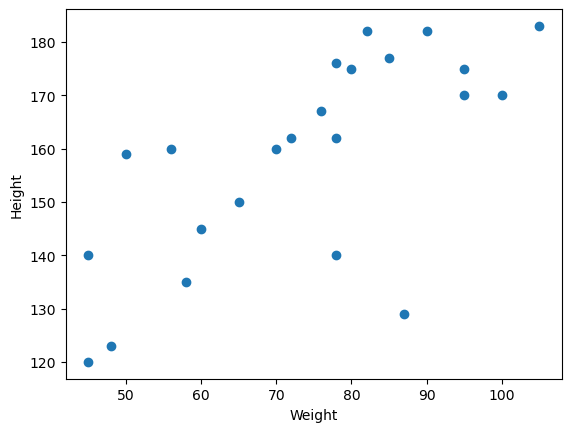

In [4]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.693969
Height,0.693969,1.000000


In [6]:
import seaborn as sns

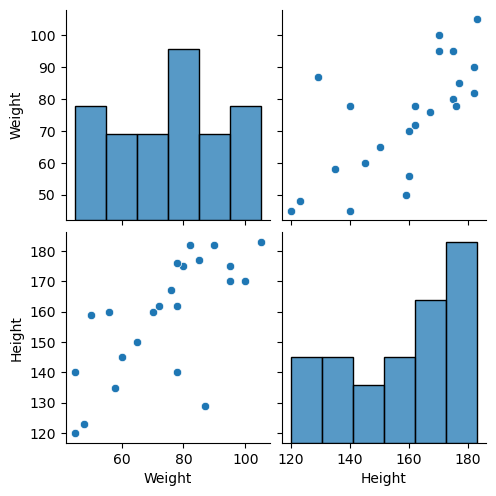

In [7]:
sns.pairplot(df)

In [8]:
## Independent and dependent features
X = df[['Weight']]
y = df['Height']

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
type(y)

pandas.core.series.Series

In [11]:
np.array(X).shape

(23, 1)

In [12]:
np.array(y).shape

(23,)

In [13]:
## Train-Test split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape

(17, 1)

In [16]:
X_test.shape

(6, 1)

In [17]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [22]:
regression = LinearRegression(n_jobs=-1)

In [23]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [26]:
## Coefficient or slop
regression.coef_

array([11.20729706])

In [27]:
## Intercept
regression.intercept_

159.0

In [30]:
X_pred = regression.predict(X_train)

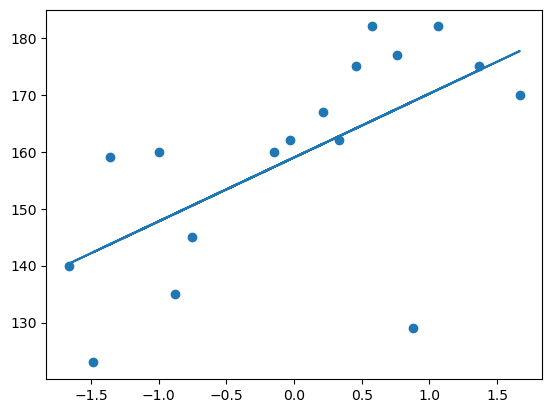

In [31]:
## Plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,X_pred)

## **prediction of test data**
1. predicted height output = intecept + coef_(weights)
2. y_pred_test = 159 + 11.20(X_test)

In [33]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [39]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
mse = mean_squared_error(y_test,y_pred)
mse

190.80714296213873

In [37]:
mae = mean_absolute_error(y_test,y_pred)
mae

11.081288836965177

In [38]:
rmse = np.sqrt(mse)
rmse

13.813295876152756

# **R-Squared Formula**

$$R^2 = 1 - \frac{SSE}{SST}$$

Where:

* $R^2$ is the coefficient of determination (R-squared)
* $SSE$ is the sum of the squared errors (residuals)
* $SST$ is the total sum of squares

In [40]:
score = r2_score(y_test,y_pred)
score

0.6067858980687507

# **Adjusted R-Squared Formula**

$$\bar{R}^2 = 1 - \frac{SSE / (n - p - 1)}{SST / (n - 1)}$$

Where:

* $\bar{R}^2$ is the adjusted coefficient of determination (adjusted R-squared)
* $n$ is the sample size
* $p$ is the number of predictors (features)

In [41]:
# Display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5084823725859384

In [42]:
## OLS Linear Regression
import statsmodels.api as sm

In [43]:
model = sm.OLS(y_train,X_train).fit()

In [44]:
prediction = model.predict(X_test)

In [45]:
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.057
Method:                 Least Squares   F-statistic:                            0.07889
Date:                Thu, 11 Jul 2024   Prob (F-statistic):                       0.782
Time:                        11:36:06   Log-Likelihood:                         -110.36
No. Observations:                  17   AIC:                                      222.7
Df Residuals:                      16   BIC:                                      223.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.2073     39.902      0.281      0.782     -73.381      95.796
==============================================================================
Omnibus:                        9.916   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.635
Skew:                          -1.320   Prob(JB):                       0.0362
Kurtosis:                       4.549   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.68049982])

In [48]:
print("The End")

The End
